In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
from skimage import io
import json
import pickle

%matplotlib inline

In [2]:
class myEncoder(json.JSONEncoder):
    def default(self, obj):
        return {'_python_object': pickle.dumps(obj)}

def as_python_object(dct):
    if '_python_object' in dct:
        return pickle.loads(str(dct['_python_object']))
    return dct

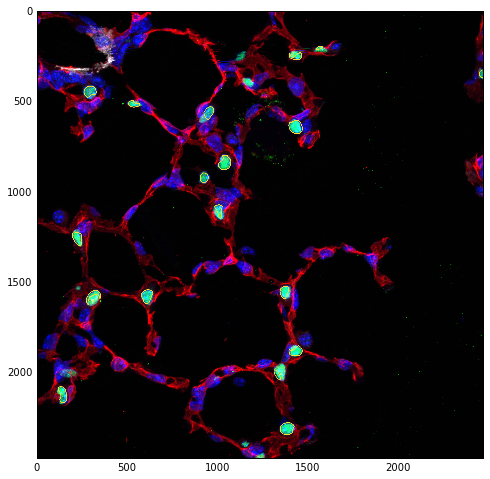

In [3]:
###Find green cells / acinar tubules#####
filename = "2015-004-015_60X_C57BL6_PND28_LMM.15.24A.6L.38_NKX2.1_EMCN_ACTA2_001.tif"
structure = "bronchiole"
im = cv2.imread("./images/2015-004-015_60X_C57BL6_PND28_LMM.15.24A.6L.38_NKX2.1_EMCN_ACTA2_001.tif")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
origin = im.copy()

R, G, B = cv2.split(im)
G_norm = cv2.normalize(G,G,0, 175, cv2.NORM_MINMAX)
#B_norm = cv2.normalize(B,B,150, 250, cv2.NORM_MINMAX)
im = cv2.merge((R, G_norm, B))
#tmp = cv2.GaussianBlur(im, (33,33),0)
tmp = cv2.GaussianBlur(im, (93,93),0)

# thresh for normalized imgs
#thresh = cv2.inRange(im, np.array([3,90,3]), np.array([80,255,220]))
thresh = cv2.inRange(tmp, np.array([0,55,40]), np.array([60,255,255]))

# find contours
c=0
finalcontours = []
#thresh = tmp
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    a = cv2.contourArea(contours[i])
    if (a>400):
        finalcontours.append(contours[i])
        c=c+1

# draw contours       
for ia in range(0, len(finalcontours)):
    temp2 = cv2.drawContours(origin,finalcontours,ia,(250,220,55),thickness=4, lineType=2,maxLevel=0)
plt.figure(figsize=(38, 8))
plt.imshow(temp2)

center = []
area = []
contours_out = []
for ct in finalcontours:
    M = cv2.moments(ct)
    ctX = int(M["m10"] / M["m00"])
    ctY = int(M["m01"] / M["m00"])
    cv2.circle(im, (ctX, ctY), 7, (255, 255, 255), -1)
    a = cv2.contourArea(ct)
    center.append((ctX,ctY))
    area.append(a)
    contours_out.append(ct)
    
output = { 'area': area,
          'center': center,
          'contour_(x,y)': contours_out,
          'img_file': filename,
          'structure': structure,
        }

with open('data_greencells.json', 'w') as outfile:
    json.dump(output, outfile, cls=myEncoder)

In [5]:
with open('data_greencells.json', 'rb') as j:
    data = json.load(j, object_hook=as_python_object)

In [6]:
import json
from pprint import pprint

pprint(data)

{u'area': [3938.0,
           2936.0,
           1056.5,
           2673.5,
           1926.5,
           3396.0,
           2386.0,
           2916.0,
           1739.5,
           1887.5,
           3817.5,
           4207.0,
           2573.5,
           1393.5,
           3032.5,
           849.5,
           1489.0,
           415.0],
 u'center': [[1383, 2312],
             [142, 2123],
             [1329, 2014],
             [1434, 1886],
             [309, 1573],
             [608, 1579],
             [1368, 1557],
             [223, 1260],
             [1007, 1105],
             [925, 926],
             [1040, 845],
             [1432, 646],
             [951, 566],
             [533, 519],
             [292, 448],
             [2462, 352],
             [1437, 257],
             [1562, 208]],
 u'contour_(x,y)': [array([[[1380, 2280]],

       [[1379, 2281]],

       [[1376, 2281]],

       [[1375, 2282]],

       [[1373, 2282]],

       [[1372, 2283]],

       [[1370, 2283]],

 